# Pacchetti

In [1]:
import pyBspline as Bs
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import scipy
from scipy.misc import derivative
from scipy.optimize import curve_fit
import pandas as pd
#from ipywidgets import interactive
#import ipywidgets as widgets
#from ipywidgets import AppLayout, FloatSlider
#from mpl_toolkits.mplot3d import Axes3D
import copy
import pandas as pd
#from scipy import integrate
#import itertools 
#import time
import os
import scipy.special
import re

###
def norm(x):
    return np.sqrt(np.sum(np.power(x,2.0)))        
      

[NbConvertApp] Converting notebook pyBspline.ipynb to script
[NbConvertApp] Writing 83345 bytes to pyBspline.py


In [2]:
def plot(fig,n,xB,yB,x,y,c,title,cmap):
    
    ax = fig.add_subplot(n)
    ax.plot(xB, yB, color= "black",label="Bspline")
    sc = ax.scatter(x,y,c=c,cmap=cmap)
    plt.colorbar(sc)
    ax.set_aspect('equal')
    plt.xlim(min(x),max(x))
    plt.ylim(min(y),max(y))
    plt.title(title)
    
    return

In [ ]:
def plot_sol(fig,n,xB,yB,x,y,c,title):
    
    ax = fig.add_subplot(n)
    ax.plot(xB, yB, color= "black",label="Bspline")
    sc = ax.scatter(x,y,c=c,cmap=cmap)
    plt.colorbar(sc)
    ax.set_aspect('equal')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.title(title)
    
    return

# Periodic Bspline

In [3]:
#definisco la dimensionaità:
sh = Bs.shape(1,2)
#sh.show()

#defiisco i knot vector
P=1 #polinomial degree
N=100 #base caridnality
xmin = 0.0
xmax = 1.0

#
#kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
#kv = periodic_kv(xmin,xmax,p=P,n=N)

kv = Bs.periodic_kv(xmin,xmax,p=P,n=N)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv],properties={"periodic":[True]})

In [4]:
#function
x0 = 0.0
y0 = 0.0
a = 1.0
b = 1.0
def func(t):
    #print(t.shape)
    #print(cpz)
    cpx = a*np.cos(2*np.pi*t)+x0#np.random.rand(N)
    cpy = b*np.sin(2*np.pi*t)+y0#np.random.rand(N)
    out = np.zeros(shape=(len(t),2))
    for i in range(len(t)):
        out[i,0] = cpx[i]
        out[i,1] = cpy[i]
    return out

In [5]:
t = np.linspace(0,1,N,endpoint=False)
cp = func(t)
for i in range(len(t)):
    #bs._cp[i] = cp[i]
    bs.set_cp(i,cp[i])
cpx = cp[:,0]
cpy = cp[:,1]

In [35]:
cp = bs.approximate(func,opts={"N":[1000]})
cpx = cp[0]
cpy = cp[1]

In [6]:
#
NN = 1000
T = np.linspace(xmin,xmax,NN,endpoint=True)
xy   = bs.evaluate(T)
df = pd.DataFrame(xy)
df = df.rename(columns={0:"x",1:"y"})

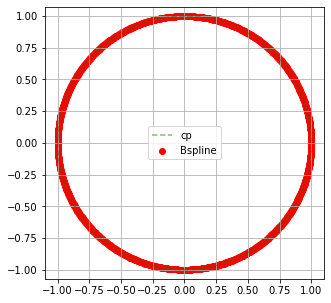

In [7]:
#grafico
plt.figure ( 0 , figsize = ( 5 , 5 ) )
   
#  
plt.plot(cpx,cpy,color="green",label="cp",linestyle="--",alpha=0.5)
plt.scatter(cpx,cpy,color="green")
plt.scatter(df["x"], df["y"], color= "red",label="Bspline")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In [8]:
der = bs.derivative()
arrow = der.evaluate(T)

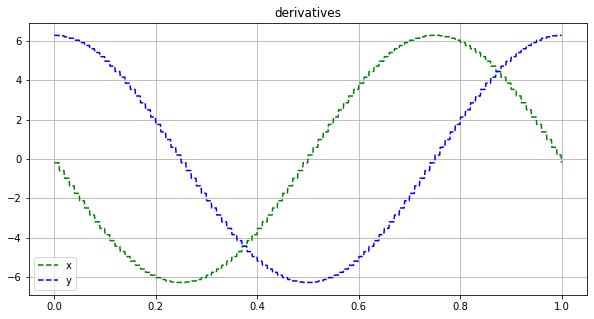

In [9]:
#grafico
plt.figure ( 0 , figsize = ( 10 , 5 ) )
   
#converto in dataframe    
plt.plot(T,arrow[:,0],color="green",label="x",linestyle="--",alpha=1)
plt.plot(T,arrow[:,1],color="blue",label="y",linestyle="--",alpha=1)
plt.legend()
plt.grid(True)
plt.title("derivatives")
plt.show()

# Hankel and Bessel functions

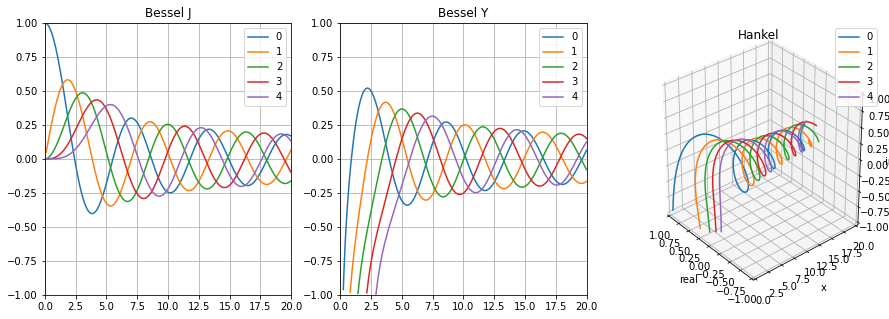

In [10]:
#
orders = [0,1,2,3,4]
t  = np.linspace(0.1,20,1000)

#
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )

#
ax = fig.add_subplot(131)  
for i in orders:
    B1 = scipy.special.jv(i,t)
    B1[B1<-1] = np.nan
    ax.plot(t, B1 ,label=str(i))#, cmap='Blues',alpha=1)
ax.set_title("Bessel J")
ax.set_ylim(-1,1)
ax.set_xlim(0,20)
plt.grid(True)
plt.legend()

#
ax = fig.add_subplot(132)  
for i in orders:
    B2 = scipy.special.yv(i,t)    
    B2[B2<-1] = np.nan
    ax.plot(t, B2 ,label=str(i))#, cmap='Blues',alpha=1)
ax.set_title("Bessel Y")
ax.set_ylim(-1,1)
ax.set_xlim(0,20)
plt.grid(True)
plt.legend()

#
ax = fig.add_subplot(133, projection='3d')  
for i in orders:
    H  = scipy.special.hankel1(i,t)
    Hr = H.real
    Hi = H.imag
    Hr[Hr<-1] = np.nan
    Hi[Hi<-1] = np.nan
    ax.plot(Hr, t, Hi ,label=str(i))#, cmap='Blues',alpha=1)
ax.set_title("Hankel")
ax.set_xlim3d(-1,1)
ax.set_ylim3d(0,20)
ax.set_zlim3d(-1,1)
ax.set_xlabel( "real" )
ax.set_ylabel( "x" )
ax.set_zlabel( "imag" )
ax.invert_xaxis()
ax.view_init(elev=30, azim=-40)
plt.grid(True)
plt.legend()


#h = scipy.special.jv(i,t) + I*scipy.special.yv(i,t)
#H = scipy.special.hankel1(i,t)
#np.nanmean(np.absolute(h-H))

plt.show()

# BEM

## Basis function

In [11]:
#definisco la dimensionaità:
sh = Bs.shape(1,2)
#sh.show()

#defiisco i knot vector
P=1 #polinomial degree
N=20 #base caridnality
xminBs = 0.0
xmaxBs = 1.0


#
#kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
#kv = periodic_kv(xmin,xmax,p=P,n=N)
kv = Bs.periodic_kv(xminBs,xmaxBs,p=P,n=N)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv],properties={"periodic":[True]})

In [12]:
#function
x0 = 0.0
y0 = 0.0
a = 1.0
b = 1.0
def func(t):
    #print(cpz)
    cpx = a*np.cos(2*np.pi*t)+x0#np.random.rand(N)
    cpy = b*np.sin(2*np.pi*t)+y0#np.random.rand(N)
    out = np.zeros(shape=(len(t),2))
    for i in range(len(t)):
        out[i,0] = cpx[i]
        out[i,1] = cpy[i]
    return out

In [13]:
t = np.linspace(0,1,N,endpoint=False)
cp = func(t)
for i in range(len(t)):
    #bs._cp[i] = cp[i]
    bs.set_cp(i,cp[i])
cpx = cp[:,0]
cpy = cp[:,1]

In [14]:
#
NN = 1000
T = np.linspace(xminBs,xmaxBs,NN,endpoint=True)
xy   = bs.evaluate(T)
df = pd.DataFrame(xy)
df = df.rename(columns={0:"x",1:"y"})

Finished/ 20 / 20


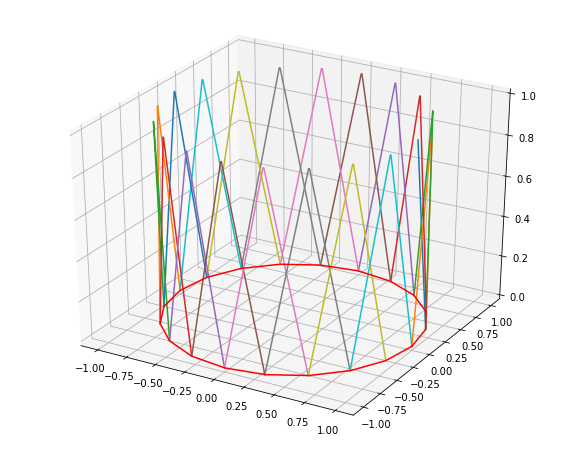

In [15]:
#
fig = plt.figure ( 0 , figsize = ( 10, 8 ) )

bsCopy = bs.copy()
bsCopy.clear_cp()
bsScal = bsCopy._scalar()
br = bs.basis_range()

#
#s = 0.2
ax = fig.add_subplot(111, projection='3d')

for i in range(N):
    print(i+1,"/",N,end="\r")
    u = np.linspace(br.at[(i,),("min",0)],br.at[(i,),("max",0)],100)
    #u = np.linspace(0,1,1000,endpoint=True)
    bsCopy.set_cp(i,bs.get_cp(i))
    bsScal.set_cp(i,1.)
    xyB = bs.evaluate(u)
    zB = bsScal.evaluate(u)
    
    #xyB = xyB[zB != 0]
    #zB  = zB[zB != 0]
    
    #xyB,zB = [ i,j for i,j in zip(xyB,zB) if j != 0.0 ]
    
    ax.plot(xyB[:,0], xyB[:,1],zB,label=str(i))
    
    bsCopy.set_cp(i,[0,0])
    bsScal.set_cp(i,0.)
    
print("Finished")

ax.plot(xy[:,0], xy[:,1],0.0,color="red",label="Bspline")
ax.set_zlim(0,1)
plt.grid(True)
#plt.legend()
plt.show()

## Circle

### Definition

In [16]:
k_in = 30/4*np.asarray([np.sqrt(3.)/2.,0.5])
wavevector = np.sqrt(np.sum(np.power(k_in,2.0)))
print("w:",wavevector)
print("h:",np.pi/(5*wavevector))
I = np.complex(0,1)

xmin = -3
xmax = 3
ymin = -3
ymax = 3

w: 7.499999999999999
h: 0.08377580409572784


In [17]:
#definisco la dimensionaità:
sh = Bs.shape(1,2)
#sh.show()

#defiisco i knot vector
P=1 #polinomial degree
N=100 #base caridnality
xminBs = 0.0
xmaxBs = 1.0


#
#kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
#kv = periodic_kv(xmin,xmax,p=P,n=N)
kv = Bs.periodic_kv(xminBs,xmaxBs,p=P,n=N)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv],properties={"periodic":[True]})

In [18]:
file_dir = "files/BEM/circle/"
suffix = "P="+str(P)+"-N="+str(N)+"-k="+str(wavevector)+".csv"
suffix_png = "P="+str(P)+"-N="+str(N)+"-k="+str(wavevector)+".png"

### Geometry

In [19]:
#function
x0 = 0.0
y0 = 0.0
a = 1.0
b = 1.0
def func(t):
    #print(cpz)
    cpx = a*np.cos(2*np.pi*t)+x0#np.random.rand(N)
    cpy = b*np.sin(2*np.pi*t)+y0#np.random.rand(N)
    out = np.zeros(shape=(len(t),2))
    for i in range(len(t)):
        out[i,0] = cpx[i]
        out[i,1] = cpy[i]
    return out

In [20]:
#ATTENZIONE: mi servono dei punti distribuiti in modo uniforme
# per come ho costruito func so che
# func(0.) = func(1.)
# quindi genero un punto in più
t = np.linspace(0,1,N+1,endpoint=True)#[0:-2]
cp = func(t)
for i in range(len(t)):
    #bs._cp[i] = cp[i]
    bs.set_cp(i,cp[i])
cpx = cp[:,0]
cpy = cp[:,1]

In [21]:
#
NN = 1000
T = np.linspace(xminBs,xmaxBs,NN,endpoint=True)
xy   = bs.evaluate(T)
df = pd.DataFrame(xy)
df = df.rename(columns={0:"x",1:"y"})

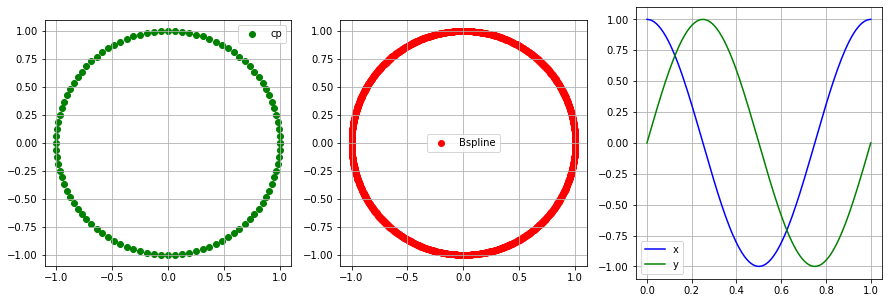

In [22]:
fig = plt.figure ( 0 , figsize = ( 15, 5 ) )

#converto in dataframe    
ax = fig.add_subplot(131)
#plt.plot(cpx,cpy,color="green",label="cp",linestyle="--")
plt.scatter(cpx,cpy,color="green",label="cp")
#plt.scatter(df["x"], df["y"], color= "red",label="Bspline")
plt.grid()
plt.legend()
ax.set_aspect('equal')

ax = fig.add_subplot(132)
#plt.plot(cpx,cpy,color="green",label="cp",linestyle="--")
#plt.scatter(cpx,cpy,color="green",label="cp")
plt.scatter(df["x"], df["y"], color= "red",label="Bspline")
plt.grid()
plt.legend()
ax.set_aspect('equal')

#real
ax = fig.add_subplot(133)#, projection='3d')
ax.plot(T,df["x"],color="blue",label="x")
ax.plot(T,df["y"],color="green",label="y")
#ax.plot(df["t"],np.real(df["trace"]),color="red",label="trace")
#plt.title("real")
plt.grid(True)
plt.legend()
plt.show()

### Stiffness Matrix

In [23]:
file = file_dir+"stiffness_matrix-n=6-"+suffix
file

'files/BEM/circle/stiffness_matrix-n=6-P=1-N=100-k=7.499999999999999.csv'

In [24]:
#
READ = True
SAVE = False
if os.path.exists(file) and READ == True :
    sm = bs.load("sm-BEM",file)
else :
    sm,out = bs.stiffness_matrix_BEM(k=wavevector,\
                                 opts={"print":True,"N":[6],"ready_sm_BEM":False,"return_both":True})
    if SAVE == True :
        bs.save("sm-BEM",file)
sm.head()

,"(0,)","(1,)","(2,)","(3,)","(4,)","(5,)","(6,)","(7,)","(8,)","(9,)",...,"(90,)","(91,)","(92,)","(93,)","(94,)","(95,)","(96,)","(97,)","(98,)","(99,)"
"(0,)",0.001206+0.000963j,0.000587+0.000893j,-0.000007+0.000625j,-0.000254+0.000438j,-0.000375+0.000232j,-0.000395+0.000029j,-0.000334-0.000141j,-0.000218-0.000257j,-0.000075-0.000307j,0.000065-0.000291j,...,0.000177-0.000222j,0.000065-0.000291j,-0.000075-0.000307j,-0.000218-0.000257j,-0.000334-0.000141j,-0.000395+0.000029j,-0.000375+0.000232j,-0.000254+0.000438j,-0.000007+0.000625j,0.000576+0.000830j
"(1,)",0.000587+0.000893j,0.001084+0.000904j,0.000580+0.000865j,-0.000006+0.000506j,-0.000203+0.000351j,-0.000300+0.000186j,-0.000316+0.000024j,-0.000267-0.000113j,-0.000174-0.000205j,-0.000060-0.000245j,...,0.000195-0.000094j,0.000141-0.000177j,0.000052-0.000233j,-0.000060-0.000245j,-0.000174-0.000205j,-0.000267-0.000113j,-0.000316+0.000024j,-0.000300+0.000186j,-0.000203+0.000351j,-0.000006+0.000506j
"(2,)",-0.000007+0.000625j,0.000580+0.000865j,0.001084+0.000904j,0.000580+0.000865j,-0.000006+0.000506j,-0.000203+0.000351j,-0.000300+0.000186j,-0.000316+0.000024j,-0.000267-0.000113j,-0.000174-0.000205j,...,0.000208-0.000001j,0.000195-0.000094j,0.000141-0.000177j,0.000052-0.000233j,-0.000060-0.000245j,-0.000174-0.000205j,-0.000267-0.000113j,-0.000316+0.000024j,-0.000300+0.000186j,-0.000203+0.000351j
"(3,)",-0.000254+0.000438j,-0.000006+0.000506j,0.000580+0.000865j,0.001084+0.000904j,0.000580+0.000865j,-0.000006+0.000506j,-0.000203+0.000351j,-0.000300+0.000186j,-0.000316+0.000024j,-0.000267-0.000113j,...,0.000182+0.000084j,0.000208-0.000001j,0.000195-0.000094j,0.000141-0.000177j,0.000052-0.000233j,-0.000060-0.000245j,-0.000174-0.000205j,-0.000267-0.000113j,-0.000316+0.000024j,-0.000300+0.000186j
"(4,)",-0.000375+0.000232j,-0.000203+0.000351j,-0.000006+0.000506j,0.000580+0.000865j,0.001084+0.000904j,0.000580+0.000865j,-0.000006+0.000506j,-0.000203+0.000351j,-0.000300+0.000186j,-0.000316+0.000024j,...,0.000126+0.000147j,0.000182+0.000084j,0.000208-0.000001j,0.000195-0.000094j,0.000141-0.000177j,0.000052-0.000233j,-0.000060-0.000245j,-0.000174-0.000205j,-0.000267-0.000113j,-0.000316+0.000024j


In [25]:
#
def plot_matrix(sm,file_png=None):
    #
    sm2 = sm.copy()
    sm2["index"] = sm2.index
    #
    new = sm2.melt(id_vars=['index'])# = sm.index
    #
    new2 = new.copy()
    new2["index"] = [ i[0] for i in new2["index"]]
    new2["variable"] = [ i[0] for i in new2["variable"]]
    #new2["value"] = [np.complex(i) for i in new2["value"] ]
    new2["real"] = np.real(new2["value"])
    new2["imag"] = np.imag(new2["value"])
    new2["abs"] = np.absolute(new2["value"])
    new2["phase"] = np.angle(new2["value"])/np.pi
    df = new2
    
    #
    fig = plt.figure ( 0 , figsize = ( 15 , 10 ) )

    cmap = 'RdYlBu'

    #
    ax = fig.add_subplot(221)
    sc = ax.scatter(df["index"],df["variable"],c=df["real"],cmap = 'RdYlBu')
    plt.colorbar(sc)
    plt.xlim(min(df["index"]),max(df["index"]))
    plt.ylim(min(df["index"]),max(df["index"]))
    ax.set_aspect('equal')
    plt.title("stiffness matrix : real")

    #
    ax = fig.add_subplot(222)
    sc = ax.scatter(df["index"],df["variable"],c=df["imag"],cmap = 'RdYlBu')
    plt.colorbar(sc)
    plt.xlim(min(df["index"]),max(df["index"]))
    plt.ylim(min(df["index"]),max(df["index"]))
    ax.set_aspect('equal')
    plt.title("stiffness matrix : imag")

    #
    ax = fig.add_subplot(223)
    sc = ax.scatter(df["index"],df["variable"],c=df["abs"],cmap = 'RdYlBu')
    plt.colorbar(sc)
    plt.xlim(min(df["index"]),max(df["index"]))
    plt.ylim(min(df["index"]),max(df["index"]))
    ax.set_aspect('equal')
    plt.title("stiffness matrix : abs")

    #
    ax = fig.add_subplot(224)
    sc = ax.scatter(df["index"],df["variable"],c=df["phase"],cmap = 'RdYlBu')
    plt.colorbar(sc)
    plt.xlim(min(df["index"]),max(df["index"]))
    plt.ylim(min(df["index"]),max(df["index"]))
    ax.set_aspect('equal')
    plt.title("stiffness matrix : $\\theta / \pi$")

    plt.tight_layout()
    if file_png is not None :
        plt.savefig(file_png)
    plt.show()
    

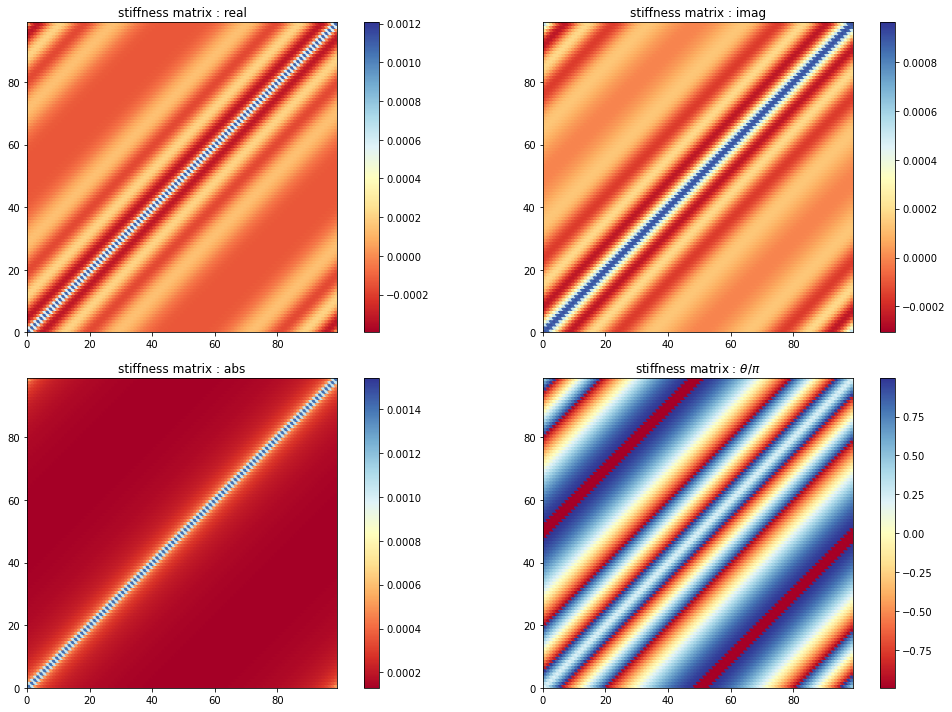

In [26]:
file_png = file_dir+"stiffness_matrix-n=6-random=False-"+suffix_png
plot_matrix(sm,file_png)

### Single Layer Potential basis

In [27]:
file = file_dir+"single_layer_potential-bis-"+suffix
file

'files/BEM/circle/single_layer_potential-bis-P=1-N=100-k=7.499999999999999.csv'

In [28]:
Nx= int(xmax-xmin)*10
Ny = int(ymax-ymin)*10
x = np.linspace(xmin,xmax,Nx)
y = np.linspace(ymin,ymax,Ny)
X,Y = np.meshgrid(x,y)

XY0 = np.zeros((Nx*Ny,2))
XY0[:,0] = X.reshape((Nx*Ny,))
XY0[:,1] = Y.reshape((Nx*Ny,))

internal = bs.internal_points(XY=XY0,NN=1000,xmin=0.,xmax=1.,opts=None)
XY = XY0[ np.logical_not(internal) ]
print(len(XY))#," = ",len(XYslp)/3600,"h")

#tolgo elementi interni
#radius = np.asarray([np.sqrt(np.sum(np.power(i,2.0))) for i in XY])
#XYslp = XY#[radius > 1.0]
#print(len(XYslp)," = ",len(XYslp)*3/3600,"h")

3292


In [29]:
READ = True
SAVE = True
if os.path.exists(file) and READ == True :
    slp = bs.load("slp-BEM",file)
#else :

# I can update it adding some  points
slp = bs.single_layer_potential_basis_BEM(XY=XY,k=wavevector,\
                                              opts={"print":True,"N":[6]})
if SAVE == True :
    bs.save("slp-BEM",file)
    
slp.head()

single_layer_potential_basis_BEM
Calculating "partial solution" for  3288  points


KeyboardInterrupt: 

### Plane wave

#### Preparation

In [ ]:
def plot(fig,n,xB,yB,x,y,c,title,cmap):
    
    ax = fig.add_subplot(n)
    ax.plot(xB, yB, color= "black",label="Bspline")
    sc = ax.scatter(x,y,c=c,cmap=cmap)
    plt.colorbar(sc)
    ax.set_aspect('equal')
    plt.xlim(min(x),max(x))
    plt.ylim(min(y),max(y))
    plt.title(title)
    
    return

In [ ]:
Nx= int(xmax-xmin)*10
Ny = int(ymax-ymin)*10
x = np.linspace(xmin,xmax,Nx)
y = np.linspace(ymin,ymax,Ny)
X,Y = np.meshgrid(x,y)

XY0 = np.zeros((Nx*Ny,2))
XY0[:,0] = X.reshape((Nx*Ny,))
XY0[:,1] = Y.reshape((Nx*Ny,))

internal = bs.internal_points(XY=XY0,NN=1000,xmin=0.,xmax=1.,opts=None)
XY = XY0[ np.logical_not(internal) ]

In [ ]:
def plane_wave(xx): # soluzione
    xx = np.asarray(xx)
    theta = np.dot(xx,k_in)
    return np.exp(I*theta)

In [ ]:
#
NN = 1000
T = np.linspace(xminBs,xmaxBs,NN,endpoint=True)
xy   = bs.evaluate(T)
uinc = plane_wave(xy)

In [ ]:
#
fig = plt.figure ( 0 , figsize = ( 15, 5 ) )

#
#s = 0.2
ax = fig.add_subplot(121, projection='3d')
ax.plot(xy[:,0], xy[:,1],uinc.real,color="blue",label="real")
ax.plot(xy[:,0], xy[:,1],uinc.imag,color="green",label="imag")
ax.plot(xy[:,0], xy[:,1],0.0,color="red",label="Bspline")
plt.grid(True)
plt.legend()

#
ax = fig.add_subplot(122)#, projection='3d')
ax.plot(T,uinc.real,color="blue",label="real")
ax.plot(T,uinc.imag,color="green",label="imag")
plt.grid(True)
plt.legend()

#
#ax = fig.add_subplot(133)#, projection='3d')
#ax.plot(T,somma.real,color="blue",label="real")
#ax.plot(T,somma.imag,color="green",label="imag")
#plt.grid(True)
#plt.legend()

plt.show()

In [ ]:
#
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )

Uinc = plane_wave(XY)

cmap = 'RdYlBu'
    
plot(fig,121,df["x"], df["y"],XY[:,0],XY[:,1],Uinc.real,"$u_{inc}$ : real",cmap)
plot(fig,122,df["x"], df["y"],XY[:,0],XY[:,1],Uinc.imag,"$u_{inc}$ : imag",cmap)

plt.show()

#### Solution

In [ ]:
file_sol = file_dir+"solution-plane_wave-"+suffix
file_lv  = file_dir+"load_vector-plane_wave-"+suffix
file_ind = file_dir+"indirect_solution-plane_wave-"+suffix
print(file_sol)
print(file_lv)
print(file_ind)

In [ ]:
#
READ = False
SAVE = True
if os.path.exists(file_sol) and READ == True :
    sol,Xnp,Valnp = bs.load("sol-BEM",file_sol)
    
if os.path.exists(file_lv) and READ == True :
    lv = bs.load("lv-BEM",file_lv)
    
if os.path.exists(file_ind) and READ == True :
    sol = bs.load("ind_sol-BEM",file_ind)
    
else :
    opts = {"print":True,"ready_sol_BEM":False,"ready_lv_BEM":False,"ready_ind_sol_BEM":False}
    sol,Xnp,Valnp = bs.BEM(uinc=plane_wave,k=wavevector,XY=XY,opts=opts)
    if SAVE == True :
        bs.save("sol-BEM",file_sol)
        bs.save("lv-BEM",file_lv)
        bs.save("ind_sol-BEM",file_ind)
sol.head()

In [ ]:
#
Uinc = plane_wave(XY)#.reshape(Nx,Ny).transpose()
total = Uinc + Valnp

In [ ]:
#grafico
fig = plt.figure ( 0 , figsize = ( 15 , 10 ) )

cmap = 'RdYlBu'

   
plot_sol(fig,331,df["x"], df["y"],XY[:,0],XY[:,1],Uinc.real,"$u_{inc}$ : real")
plot_sol(fig,334,df["x"], df["y"],XY[:,0],XY[:,1],Uinc.imag,"$u_{inc}$ : imag")
plot_sol(fig,337,df["x"], df["y"],XY[:,0],XY[:,1],np.absolute(Uinc),"$u_{inc}$ : abs")

plot_sol(fig,332,df["x"], df["y"],XY[:,0],XY[:,1],Valnp.real,"$u_{scat}$ : real")
plot_sol(fig,335,df["x"], df["y"],XY[:,0],XY[:,1],Valnp.imag,"$u_{scat}$ : imag")
plot_sol(fig,338,df["x"], df["y"],XY[:,0],XY[:,1],np.absolute(Valnp),"$u_{scat}$ : abs")

plot_sol(fig,333,df["x"], df["y"],XY[:,0],XY[:,1],total.real,"$u_{tot}$ : real")
plot_sol(fig,336,df["x"], df["y"],XY[:,0],XY[:,1],total.imag,"$u_{tot}$ : imag")
plot_sol(fig,339,df["x"], df["y"],XY[:,0],XY[:,1],np.absolute(total),"$u_{tot}$ : abs")

plt.tight_layout()

sol_png = file_dir+"solution-n=6-random=False-"+suffix_png
plt.savefig(sol_png)

plt.show()

### Herglotz

#### Kernel

In [ ]:
#definisco la dimensionaità:
sh = Bs.shape(1,1)
#sh.show()

#defiisco i knot vector
P=0 #polinomial degree
N=12 #base caridnality

#
#kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
#kv = periodic_kv(xmin,xmax,p=P,n=N)
kv = Bs.periodic_kv(0.0,2*np.pi,p=P,n=N)
#kv.show()

#alloco la Bspline
kernel = Bs.Bspline(sh,[kv],properties={"periodic":[True],"dtype":np.complex})
#bs.show()

kernel.clear_cp()
kernel.set_cp(0,1)

In [ ]:
#
NN = 1000
T = np.linspace(0.0,2*np.pi,NN,endpoint=False)
y   = kernel.evaluate(T)
#df = pd.DataFrame(xy)
#df = df.rename(columns={0:"x",1:"y"})

In [ ]:
fig = plt.figure ( 0 , figsize = ( 15, 5 ) )

#real
ax = fig.add_subplot(111)#, projection='3d')
ax.plot(T,y.real,color="blue",label="real")
ax.plot(T,y.imag,color="green",label="imag")
plt.xlabel(r"$\theta \, \left[ rad \right]$")
plt.title(r"Herglotz kernel $\, g \left( \theta \right) \, : 1 \, $ if $ \,  - \pi/6 < \theta < \pi/6$")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
def Herglotz_private(xy,kernel,k,NN):
    xy = np.asarray(xy)
    theta = np.linspace(0.,2*np.pi,NN,endpoint=False)
    cos = np.cos(theta)
    sin = np.sin(theta)
    g = kernel(theta)
    phase = np.outer(xy[:,0],cos) + np.outer(xy[:,1],sin)
    expo = np.exp(1.j*phase*k)
    return np.dot(expo,g)/NN

In [ ]:
#k = 30./4.
NN = 100
def Herglotz(xy): 
    return Herglotz_private(xy,kernel,wavevector,NN)

In [ ]:
Nx= int(xmax-xmin)*10
Ny = int(ymax-ymin)*10
x = np.linspace(xmin,xmax,Nx)
y = np.linspace(ymin,ymax,Ny)
X,Y = np.meshgrid(x,y)

XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))

x = XY[:,0]
y = XY[:,1]

In [ ]:
Uinc = Herglotz(XY)

In [ ]:
#
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )

cmap = 'RdYlBu'

ax = fig.add_subplot(131)
#ax.plot(xB, yB, color= "black",label="Bspline")
sc = ax.scatter(x,y,c=Uinc.real,cmap=cmap)
plt.colorbar(sc)
ax.set_aspect('equal')
plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
plt.title("real")

ax = fig.add_subplot(132)
#ax.plot(xB, yB, color= "black",label="Bspline")
sc = ax.scatter(x,y,c=Uinc.imag,cmap=cmap)
plt.colorbar(sc)
ax.set_aspect('equal')
plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
plt.title("imag")

ax = fig.add_subplot(133)
#ax.plot(xB, yB, color= "black",label="Bspline")
sc = ax.scatter(x,y,c=np.absolute(Uinc),cmap=cmap)
plt.colorbar(sc)
ax.set_aspect('equal')
plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
plt.title("abs")

#ax = fig.add_subplot(224)
##ax.plot(xB, yB, color= "black",label="Bspline")
#sc = ax.scatter(x,y,c=np.angle(Uinc),cmap=cmap)
#plt.colorbar(sc)
#ax.set_aspect('equal')
#plt.xlim(min(x),max(x))
#plt.ylim(min(y),max(y))
#plt.title("phase")

plt.show()

#### Preparation

In [ ]:
Nx= int(xmax-xmin)*10
Ny = int(ymax-ymin)*10
x = np.linspace(xmin,xmax,Nx)
y = np.linspace(ymin,ymax,Ny)
X,Y = np.meshgrid(x,y)

XY0 = np.zeros((Nx*Ny,2))
XY0[:,0] = X.reshape((Nx*Ny,))
XY0[:,1] = Y.reshape((Nx*Ny,))

internal = bs.internal_points(XY=XY0,NN=1000,xmin=0.,xmax=1.,opts=None)
XY = XY0[ np.logical_not(internal) ]

In [ ]:
#
NN = 1000
T = np.linspace(xminBs,xmaxBs,NN,endpoint=True)
xy   = bs.evaluate(T)
uinc = Herglotz(xy)

In [ ]:
#
fig = plt.figure ( 0 , figsize = ( 15, 5 ) )

#
#s = 0.2
ax = fig.add_subplot(121, projection='3d')
ax.plot(xy[:,0], xy[:,1],uinc.real,color="blue",label="real")
ax.plot(xy[:,0], xy[:,1],uinc.imag,color="green",label="imag")
ax.plot(xy[:,0], xy[:,1],0.0,color="red",label="Bspline")
plt.grid(True)
plt.legend()

#
ax = fig.add_subplot(122)#, projection='3d')
ax.plot(T,uinc.real,color="blue",label="real")
ax.plot(T,uinc.imag,color="green",label="imag")
plt.grid(True)
plt.legend()

#
#ax = fig.add_subplot(133)#, projection='3d')
#ax.plot(T,somma.real,color="blue",label="real")
#ax.plot(T,somma.imag,color="green",label="imag")
#plt.grid(True)
#plt.legend()

plt.show()

In [ ]:
#
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )

Uinc = Herglotz(XY)

cmap = 'RdYlBu'
    
plot(fig,121,df["x"], df["y"],XY[:,0],XY[:,1],Uinc.real,"$u_{inc}$ : real",cmap)
plot(fig,122,df["x"], df["y"],XY[:,0],XY[:,1],Uinc.imag,"$u_{inc}$ : imag",cmap)

plt.show()

#### Solution

In [ ]:
file_sol = file_dir+"solution-Herglotz-"+suffix
file_lv  = file_dir+"load_vector-Herglotz-"+suffix
file_ind = file_dir+"indirect_solution-Herglotz-"+suffix
print(file_sol)
print(file_lv)
print(file_ind)

In [ ]:
#
READ = False
SAVE = True
if os.path.exists(file_sol) and READ == True :
    sol,Xnp,Valnp = bs.load("sol-BEM",file_sol)
    
if os.path.exists(file_lv) and READ == True :
    lv = bs.load("lv-BEM",file_lv)
    
if os.path.exists(file_ind) and READ == True :
    sol = bs.load("ind_sol-BEM",file_ind)
    
else :
    opts = {"print":True,"ready_sol_BEM":False,"ready_lv_BEM":False,"ready_ind_sol_BEM":False}
    sol,Xnp,Valnp = bs.BEM(uinc=Herglotz,k=wavevector,XY=XY,opts=opts)
    if SAVE == True :
        bs.save("sol-BEM",file_sol)
        bs.save("lv-BEM",file_lv)
        bs.save("ind_sol-BEM",file_ind)
sol.head()

In [ ]:
#
Uinc = Herglotz(XY)#.reshape(Nx,Ny).transpose()
total = Uinc + Valnp

In [ ]:
#grafico
fig = plt.figure ( 0 , figsize = ( 15 , 10 ) )

cmap = 'RdYlBu'
    
plot_sol(fig,331,df["x"], df["y"],XY[:,0],XY[:,1],Uinc.real,"$u_{inc}$ : real")
plot_sol(fig,334,df["x"], df["y"],XY[:,0],XY[:,1],Uinc.imag,"$u_{inc}$ : imag")
plot_sol(fig,337,df["x"], df["y"],XY[:,0],XY[:,1],np.absolute(Uinc),"$u_{inc}$ : abs")

plot_sol(fig,332,df["x"], df["y"],XY[:,0],XY[:,1],Valnp.real,"$u_{scat}$ : real")
plot_sol(fig,335,df["x"], df["y"],XY[:,0],XY[:,1],Valnp.imag,"$u_{scat}$ : imag")
plot_sol(fig,338,df["x"], df["y"],XY[:,0],XY[:,1],np.absolute(Valnp),"$u_{scat}$ : abs")

plot_sol(fig,333,df["x"], df["y"],XY[:,0],XY[:,1],total.real,"$u_{tot}$ : real")
plot_sol(fig,336,df["x"], df["y"],XY[:,0],XY[:,1],total.imag,"$u_{tot}$ : imag")
plot_sol(fig,339,df["x"], df["y"],XY[:,0],XY[:,1],np.absolute(total),"$u_{tot}$ : abs")

plt.tight_layout()

sol_png = file_dir+"solution-n=6-random=False-"+suffix_png
plt.savefig(sol_png)

plt.show()

- scelgo i punti in cui valutare la soluzione
- calcolo il valore della soluzione con $\psi_i$ al posto di $\psi$
- poi modificando $u_{inc}$ varierà $\psi$ ma potrò comunque sfruttare la matrice calcolata

- devo incrementare il numero di punti usati per calcolare la matrice di stiffness
- devo tener conto della periodicità nel domionio delle funzioni 
- devo tener conto che adesso il numero di funzioni di base è diverso da quello dei control points (perché alcuni sono periodici)
- creo una funzione che per ogni control point mi restituisce le funzioni di base associate, in questo modo posso riutilizzare le funzioni già scritte senza stravolgerle, devo però stare attento agli indici delle matrici

- ci sarebbe anche da riordinare il modo in cui salvo le varie matrici, sarebbe comodo usare un dict, in questo modo in ogni funzione posso usare la stessa porzione di codice variando soltanto alcuni parametri passati come stringhe

- devo creare delle Bspline periodiche
- l'ultimo control points non deve essere accessibile
- devo modificare le funzioni di approssimazione
- devo togliere dalle matrici le righe che corrispondono ai dof periodici dopo aver sommato il loro contributo agli altri dof
- sistemare solo la funzione approximate per adesso

- approximate
- edge
- Dirichlet_BC
- Galerkin

cioè solo le funzioni che vanno a modificare i control points della Bspline

- devo creare una funzione, che faccia uso dei dataframe, che sappia calcolarmi la Trasformata di Fourier in modo \textit{intuitivo}
- sfruttare poi quanto fatto per calcolare la trasformata di Fourier della funzione $g_D$ e calcolare la soluzione esatta di scattering da disco di raggio $R$
- attenzione, non so quanto valga di preciso il raggio del mio disco, devo implementare la funzione \textit{approximate} in modo tale poi da definire la funzione che mappa $t\in\left[0,1\right]\rightarrow \mathbf{S}\in\mathbf{R}^2$ e poi approssimarla 

- anche nel grafico che avevo ottenuto la volta scorso sembra esserci un errore, poiché nella stiffness matrix gli elementi diagonali sono molti più "intensi", adesso dovrei aver raffinato il passo d'integrazione
- generando 4 punti dovrei ottenere 4x4 coppie xy, di cui 4 con x=y, quindi ottengo una media su 10 punti
- adesso genero 16 punti quindi 16x16 coppie xy, quindi una media su 240 punti